In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import acquire
import prepare
import warnings
warnings.filterwarnings('ignore')

### 1. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
df_iris = pd.DataFrame(sns.load_dataset('iris'))

df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### print the first 3 rows

In [3]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


### print the number of rows and columns (shape)

In [4]:
df_iris.shape

(150, 5)

### print the column names

In [5]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### print the data type of each column

In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [7]:
df_iris.describe()
# The scale is reasonable and I don't see a point in rescaling the data based on its statistics

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [8]:
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx')

In [9]:
df_excel

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,742.90,No
7045,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,1873.70,Yes
7046,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,92.75,No
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,4627.65,No


### assign the first 100 rows to a new dataframe, df_excel_sample

In [10]:
df_excel_sample = df_excel.head(100)
df_excel_sample

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0164-APGRB,Female,0,No,No,2,2,2,Electronic check,114.90,8496.70,No
96,0164-XAIRP,Female,0,No,No,1,0,2,Bank transfer (automatic),19.55,470.20,No
97,0168-XZKBB,Female,0,Yes,No,2,2,0,Electronic check,86.85,1564.40,No
98,0174-QRVVY,Male,0,Yes,Yes,2,0,2,Credit card (automatic),25.35,1847.55,No


### print the number of rows of your original dataframe

In [11]:
df_excel.shape[0]

7049

### print the first 5 column names

In [12]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

### print the column names that have a data type of object

In [13]:
df_excel.dtypes[df_excel.dtypes == 'object']

customer_id     object
gender          object
partner         object
dependents      object
payment_type    object
churn           object
dtype: object

### compute the range for each of the numeric variables.

In [14]:
nv = df_excel.select_dtypes(np.number)
nv_ranges = nv.max() - nv.min()
nv_ranges

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

### 3. Read the data from this google sheet into a dataframe, df_google

In [15]:
train = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
train = train.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(train)

In [16]:
df_google

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### print the first 3 rows

In [17]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### print the number of rows and columns

In [18]:
df_google.shape

(891, 12)

### print the column names

In [19]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### print the data type of each column

In [20]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### print the summary statistics for each of the numeric variables

In [21]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### print the unique values for each of your categorical variables

In [22]:
cv = df_google.select_dtypes(np.object)

In [23]:
cv.nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [26]:
df = acquire.get_titanic_data()
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


### 1. Iris Data



### Use the function defined in acquire.py to load the iris data.

In [36]:
df = acquire.get_iris_data()
df

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...
145,3,virginica,6.7,3.0,5.2,2.3
146,3,virginica,6.3,2.5,5.0,1.9
147,3,virginica,6.5,3.0,5.2,2.0
148,3,virginica,6.2,3.4,5.4,2.3


### Drop the species_id and measurement_id columns.

In [37]:
df = df.drop(columns ='species_id')
df

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3
146,virginica,6.3,2.5,5.0,1.9
147,virginica,6.5,3.0,5.2,2.0
148,virginica,6.2,3.4,5.4,2.3


### Rename the species_name column to just species.

In [38]:
df.rename(columns = {'species_name': 'species'}, inplace = True)
df

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3
146,virginica,6.3,2.5,5.0,1.9
147,virginica,6.5,3.0,5.2,2.0
148,virginica,6.2,3.4,5.4,2.3


### Create dummy variables of the species name.

In [39]:
dummies = pd.get_dummies(df['species'], dummy_na=False)
df = pd.concat([df, dummies], axis=1)
df

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3,0,0,1
146,virginica,6.3,2.5,5.0,1.9,0,0,1
147,virginica,6.5,3.0,5.2,2.0,0,0,1
148,virginica,6.2,3.4,5.4,2.3,0,0,1


### Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [40]:
def prep_iris(df):
    df = acquire.get_iris_data()
    df = df.drop(columns='species_id')
    df = df.rename(columns={'species_name': 'species'})
    species_dummies = pd.get_dummies(df.species)
    df = pd.concat([df, species_dummies], axis=1)
    
    return df

In [41]:
iris = prep_iris(df)
iris

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3,0,0,1
146,virginica,6.3,2.5,5.0,1.9,0,0,1
147,virginica,6.5,3.0,5.2,2.0,0,0,1
148,virginica,6.2,3.4,5.4,2.3,0,0,1


### 2. Titanic Data

### Use the function you defined in acquire.py to load the titanic data set.

In [44]:
df = acquire.get_titanic_data()
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


### Handle the missing values in the embark_town and embarked columns.

In [45]:
df = df.drop(columns = 'embark_town')
df = df[~df.embarked.isnull()]
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,1


### Remove the deck column.

In [46]:
df = df.drop(columns = 'deck')
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,1
...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,1


### Create a dummy variable of the embarked column.

In [47]:
dummies = pd.get_dummies(df['embarked'], dummy_na=False)
df = pd.concat([df, dummies], axis=1)

In [48]:
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone,C,Q,S
0,0,0,3,male,22.0,1,0,7.2500,S,Third,0,0,0,1
1,1,1,1,female,38.0,1,0,71.2833,C,First,0,1,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,1,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,0,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,S,Third,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,1,0,0,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,1,0,0,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,0,0,0,1
889,889,1,1,male,26.0,0,0,30.0000,C,First,1,1,0,0


### Continue in your classification_exercises.ipynb notebook. Use the iris dataset. As always, add, commit, and push your changes.

1. Split your data into train, validate, and test samples.

In [55]:
iris = prepare.prep_iris()
iris = iris.drop(columns=['virginica', 'versicolor', 'setosa'])
iris

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3
146,virginica,6.3,2.5,5.0,1.9
147,virginica,6.5,3.0,5.2,2.0
148,virginica,6.2,3.4,5.4,2.3


In [56]:
plt.rc('font', size=16)
plt.rc('figure', figsize=(13,7))

In [57]:
train_validate, test = train_test_split(iris, test_size=.2, random_state=123, stratify=iris.species)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123, stratify=train_validate.species)

print(f'train: {train.shape}')
print(f'validate: {validate.shape}')
print(f'test: {test.shape}')

train: (84, 5)
validate: (36, 5)
test: (30, 5)


2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

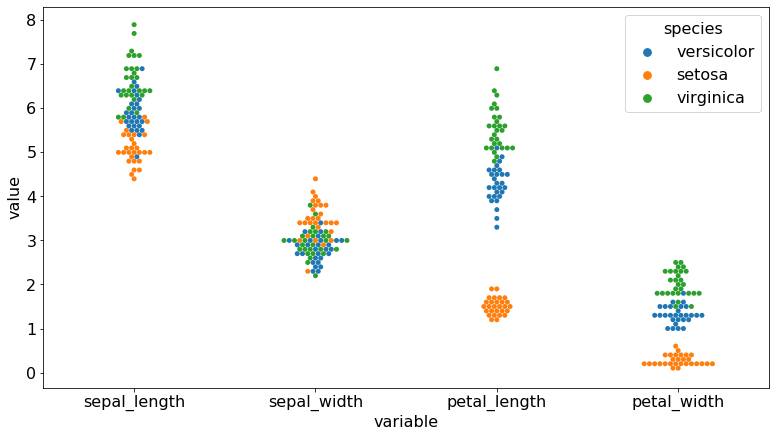

In [58]:
melt = train.melt(id_vars=['species'])

sns.swarmplot(data=melt, x='variable', y='value', hue='species')

The most apparent takeaways for this is that petal length and petal width are the best for differentiating species.

3. Create 4 subplots (2 rows x 2 columns) of scatterplots.

    * sepal_length x sepal_width
    * petal_length x petal_width
    * sepal_area x petal_area
    * sepal_length x petal_length
    * What are your takeaways?

In [59]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train.petal_length * train.petal_width

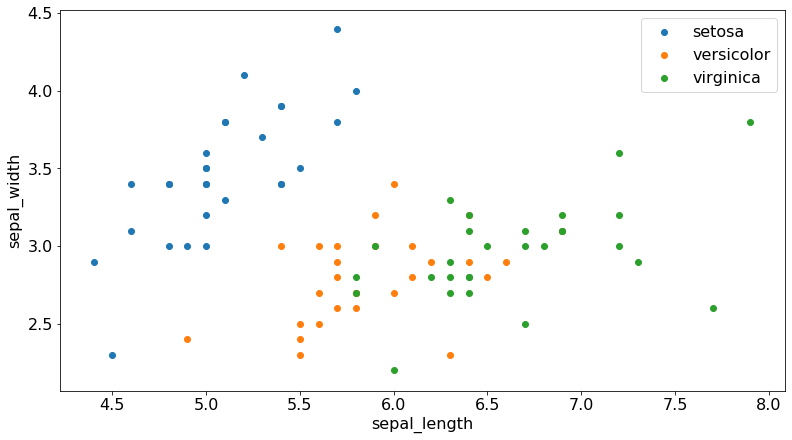

In [60]:
def scatter_by_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
scatter_by_species('sepal_length', 'sepal_width')

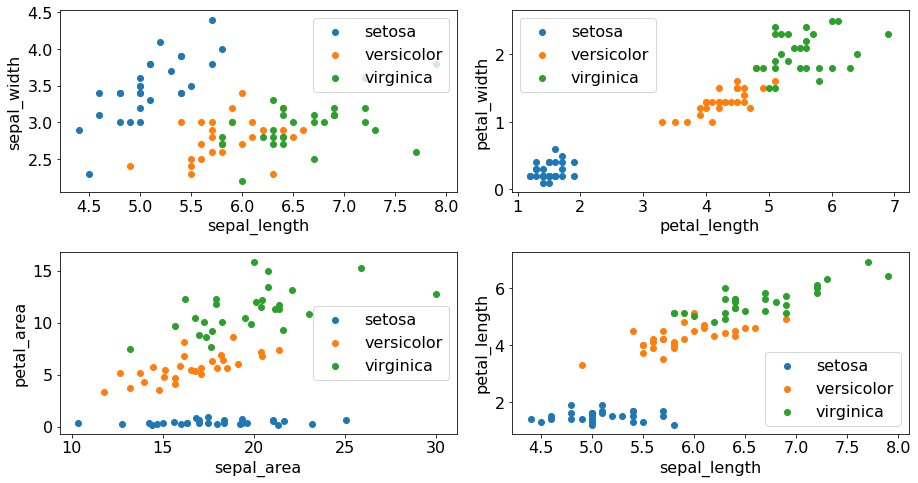

In [61]:
plt.subplot(2, 2, 1)
scatter_by_species('sepal_length', 'sepal_width')
plt.subplot(2, 2, 2)
scatter_by_species('petal_length', 'petal_width')
plt.subplot(2, 2, 3)
scatter_by_species('sepal_area', 'petal_area')
plt.subplot(2, 2, 4)
scatter_by_species('sepal_length', 'petal_length')
plt.tight_layout()

4. Create a heatmap of each variable layering correlation coefficient on top.

In [62]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,-0.154904,0.867976,0.824691,0.619853,0.860498
sepal_width,-0.154904,1.000000,-0.476228,-0.403306,0.673554,-0.341702
petal_length,0.867976,-0.476228,1.000000,0.957345,0.271618,0.953510
petal_width,0.824691,-0.403306,0.957345,1.000000,0.299920,0.982404
sepal_area,0.619853,0.673554,0.271618,0.299920,1.000000,0.373870
petal_area,0.860498,-0.341702,0.953510,0.982404,0.373870,1.000000


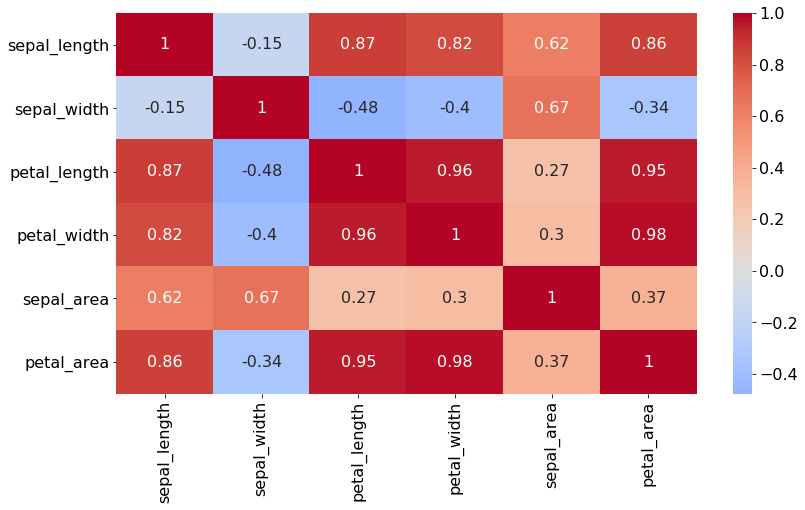

In [63]:
sns.heatmap(train.corr(), cmap='coolwarm', center=0, annot=True)

5. Create a scatter matrix visualizing the interaction of each variable.

<Figure size 1728x1152 with 0 Axes>

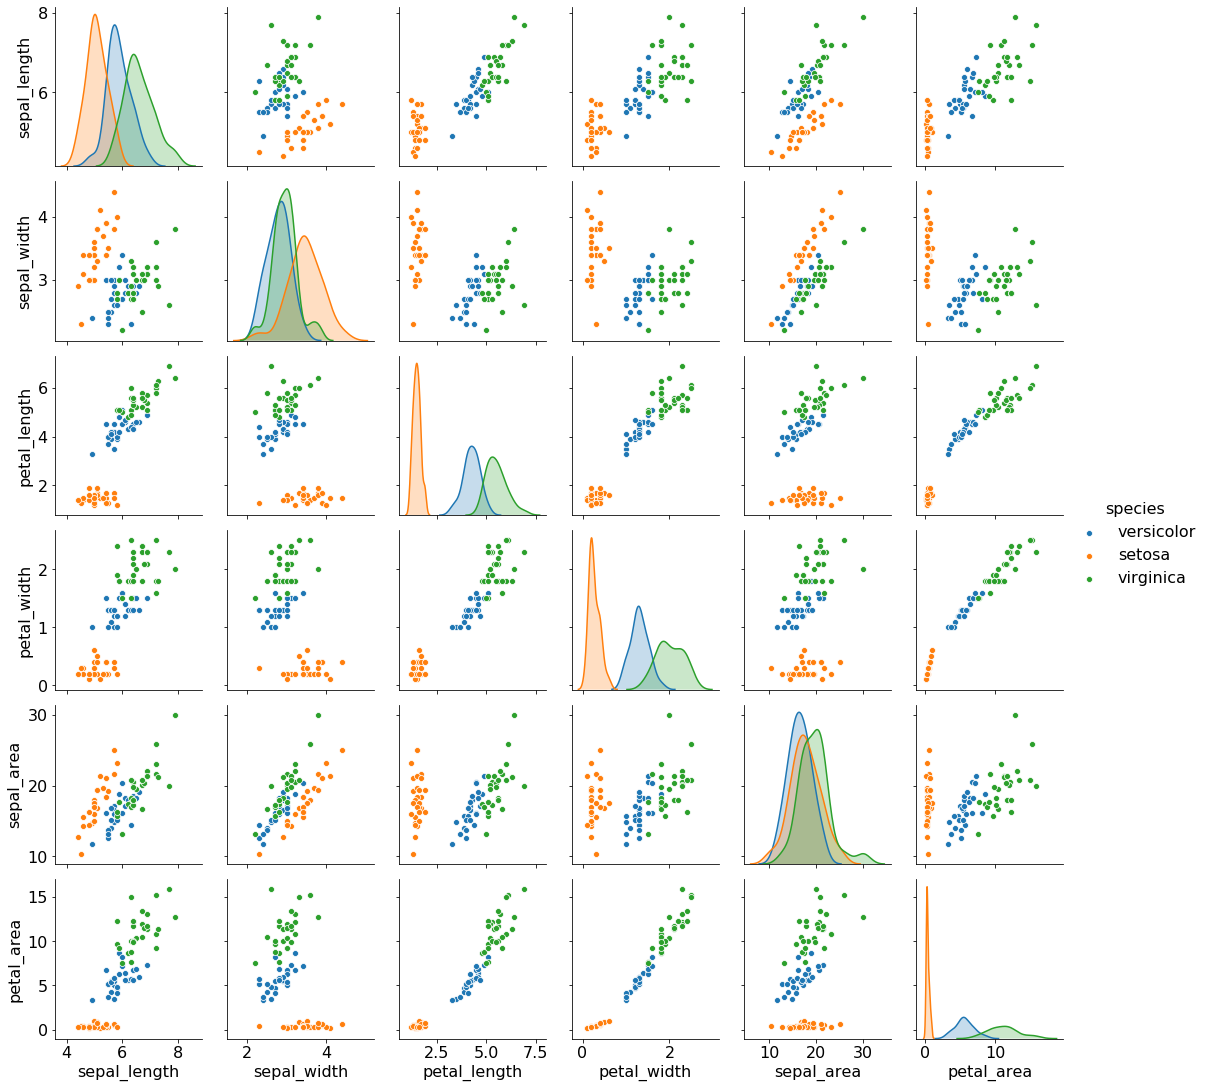

In [64]:
plt.figure(figsize=(24,16))
sns.pairplot(train, hue='species')

6. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

In [65]:
import scipy.stats as stats
virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']

In [66]:
train.sepal_length.describe()

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

In [67]:
virginica.sepal_length.var(), versicolor.sepal_length.var()

(0.283425925925926, 0.18109788359788362)

In [68]:
t, p = stats.ttest_ind(virginica.sepal_length, versicolor.sepal_length)
print(f't: {t}  p: {p}')

t: 5.656491804882077  p: 6.024259917536193e-07


We reject the null hypothesis that the sepal length is the same for both because the p value is very low.

7. Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

8. What is your takeaway from this statistical testing?

9. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.